In [115]:
#Importing libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [123]:
# Load the dataset
data = pd.read_csv('C:/Users/user/Desktop/Graduate Applications/Flood Data/Flood_Data1.csv')

# Inspect the first few rows
print(data.head())

   YEAR  STATE  FLOOD OCCURENCE     RH  MAX_TEMP  MIN_TEMP  PRECIPITATION
0  1990  BENUE                0  77.38     35.99     14.08        1165.43
1  1990    FCT                0  74.44     38.61     13.43        1270.90
2  1990   KOGI                0  77.50     36.12     16.42         949.22
3  1990  KWARA                0  68.44     39.73     15.85         849.02
4  1990   NASS                0  74.12     38.76     14.87        1244.53


In [152]:
# Define the features (X) and target (y)
X = data.drop(columns=['FLOOD OCCURENCE'])  # All independent variables
y = data['FLOOD OCCURENCE']  # Dependent variable

# If 'State' is categorical, you need to encode it
X = pd.get_dummies(X, columns=['STATE'], drop_first=True)

# Check the processed data
print(X.head())

      RH  MAX_TEMP  MIN_TEMP  PRECIPITATION  STATE_FCT  STATE_KOGI  \
0  77.38     35.99     14.08        1165.43      False       False   
1  74.44     38.61     13.43        1270.90       True       False   
2  77.50     36.12     16.42         949.22      False        True   
3  68.44     39.73     15.85         849.02      False       False   
4  74.12     38.76     14.87        1244.53      False       False   

   STATE_KWARA  STATE_NASS  STATE_NIGER  STATE_PLATEAU  ...  YEAR_2013  \
0        False       False        False          False  ...      False   
1        False       False        False          False  ...      False   
2        False       False        False          False  ...      False   
3         True       False        False          False  ...      False   
4        False        True        False          False  ...      False   

   YEAR_2014  YEAR_2015  YEAR_2016  YEAR_2017  YEAR_2018  YEAR_2019  \
0      False      False      False      False      False      F

In [160]:
#Spliting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize AdaBoost classifier
adb_clf = AdaBoostClassifier()

# Define the hyperparameters and their respective values to be tested
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=adb_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy: {:.2f}".format(test_accuracy))

Best parameters found:  {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 100}
Best cross-validation accuracy: 0.83
Test accuracy: 0.86


In [161]:
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on test set: {mae}')

Mean Absolute Error on test set: 0.14285714285714285


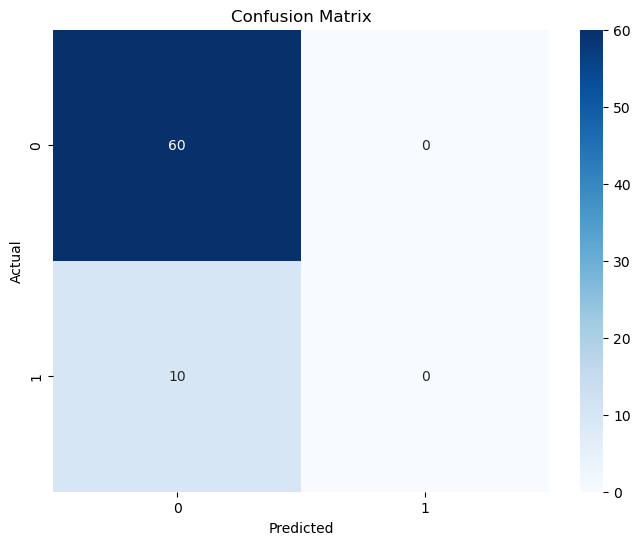

In [162]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [163]:
# Predict on the test data
y_pred = best_model.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Print the results
print(f"MAPE: {mape:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

MAPE: 0.1429
MSE: 0.1429
R²: -0.1667
RMSE: 0.3780


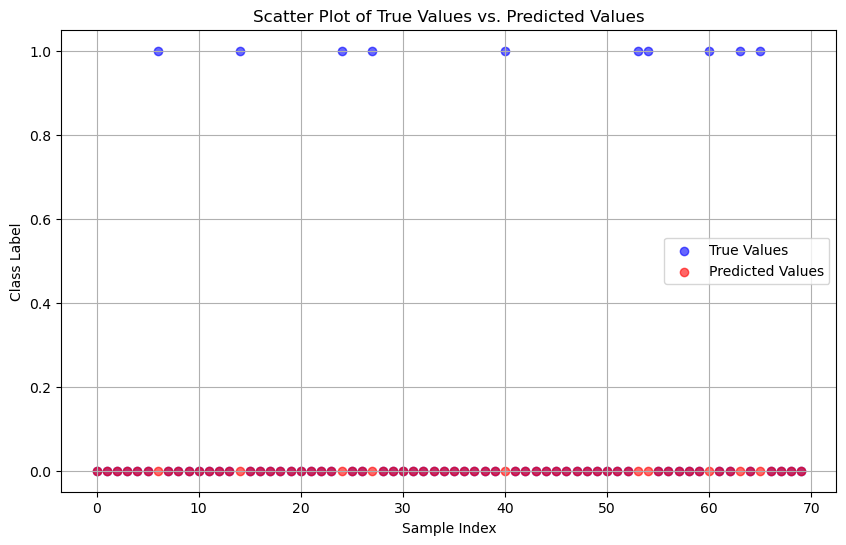

In [164]:
# Create a scatter plot for y_test and y_pred
plt.figure(figsize=(10, 6))

# Scatter plot for true values
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.6, label='True Values')

# Scatter plot for predicted values
plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.6, label='Predicted Values')

plt.title('Scatter Plot of True Values vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.legend()
plt.grid(True)
plt.show()

In [165]:
# Calculate Pearson correlation coefficient
correlation = np.corrcoef(y_test, y_pred)[0, 1]

print(f'Correlation Index between True Values and Predicted Values: {correlation:.2f}')

Correlation Index between True Values and Predicted Values: nan


C:\Users\user\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\user\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Length of y_test: 70
Length of y_pred: 70


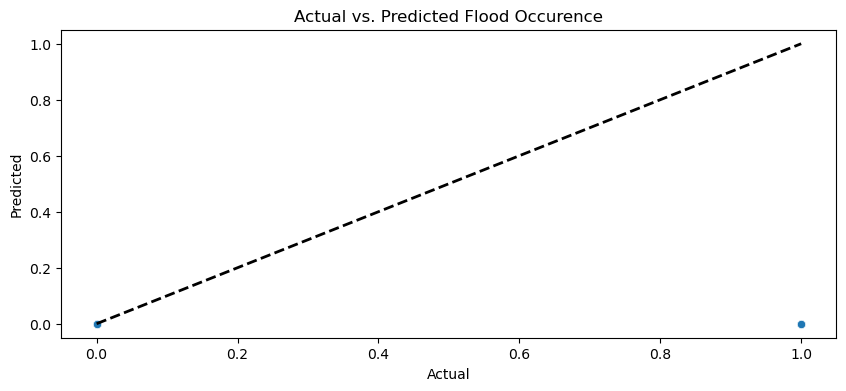

In [166]:
# Check the lengths of y_test and y_pred
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(y_pred)}")


# Visualize actual vs. predicted values if they are of the same length
if len(y_test) == len(y_pred):
    plt.figure(figsize=(10, 4))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted Flood Occurence')
    plt.show()
else:
    print("Error: y_test and y_pred lengths do not match.")

In [170]:
r2 = r2_score(y_test, y_pred)